## Programming for Data Analytics Big Project

*******************

##### Author: Jennifer Ibanez Cano

##### Module: PFDA, ATU course 24/25
##### Lecture: Andrew Beatty 

*****************

##### Description

This notebook contains my work performing data analysis on a data. For this project I'll be using a data set from [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/863/maternal+health+risk), that I found very interesting. 

This dataset has been collected from different hospitals, community clinics, maternal health cares from the rural areas of Bangladesh through the IoT based risk monitoring system.

![maternity](https://www.nimhd.nih.gov/images/pregsource.jpg)

*********

##### Analyzing the data

In [139]:
# First I'll import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import os

In [140]:
# Read the data from the csv file

df = pd.read_csv('data/Maternal Health Risk Data Set.csv')

df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [141]:
# Check the list of the columns in the dataset.

list(df.columns)

['Age',
 'SystolicBP',
 'DiastolicBP',
 'BS',
 'BodyTemp',
 'HeartRate',
 'RiskLevel']

The dataset contains 7 variables: Age, Systolic Blood Pressure as SystolicBP, Diastolic BP as DiastolicBP, Blood Sugar as BS, Body Temperature as BodyTemp, HeartRate and RiskLevel. All this variable are factors that can be responsible and as a significant risk factors for maternal mortality.

In [142]:
# Looking at the length of the dataset

print('Data length:', len(df), 'entries.')

Data length: 1014 entries.


In [143]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [144]:
# Applying dropna() to remove any missing values in the dataset

df = df.dropna()

In [145]:
df.iloc[0]

Age                   25
SystolicBP           130
DiastolicBP           80
BS                  15.0
BodyTemp            98.0
HeartRate             86
RiskLevel      high risk
Name: 0, dtype: object

In [146]:
# Renaming the first column as 'Participant' in the survey
df.rename_axis('Participant', inplace=True)

df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
Participant,,,,,,,
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


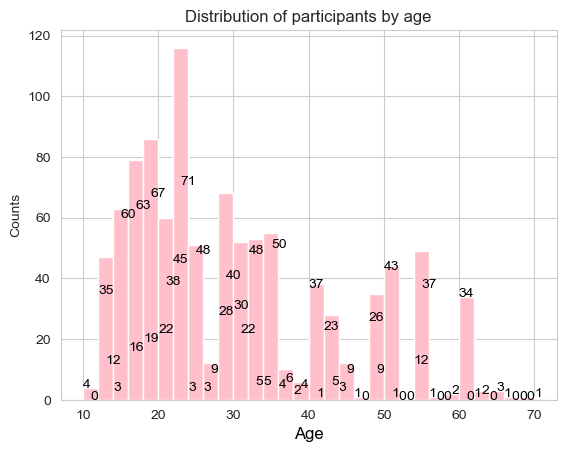

In [147]:
# Looking at the distribution of the age of the participants in the survey
plt.hist(df['Age'], bins=30, color='pink')    

# Adding the numbers of participants in each column
plt.hist(df['Age'], bins=30, color='pink')
for i in range(df['Age'].min(), df['Age'].max() + 1):
    plt.text(i, df['Age'][df['Age'] == i].count(), str(df['Age'][df['Age'] == i].count()), color='black')

plt.title('Distribution of participants by age')
plt.xlabel('Age', fontsize=12, color='black') 
plt.ylabel('Counts')
plt.grid(True)
plt.show()

In [148]:
# Looking at the minimum and maximum age in the dataset.
min_age = df['Age'].min()
print("The minimum age in this data set is", min_age, 'years old.')

max_age = df['Age'].max()
print("The maximum age in this data set is", max_age, 'years old.')

The minimum age in this data set is 10 years old.
The maximum age in this data set is 70 years old.


In [149]:
# Creating a function to categorize age groups
def categorize_age(age):
    if age < 18:
        return "<18"
    elif 19 <= age <= 29:
        return "19-29"
    elif 30 <= age <= 39:
        return "30-39"
    elif 40 <= age <= 49:
        return "40-49"
    elif 50 <= age <= 59:
        return "50-59"
    else:
        return ">60"

# Applying the function to create a new column named 'Age_Group'
df['Age_Group'] = df['Age'].apply(categorize_age)

# Looking at the new column 'Age_Group'
print(df.head())


             Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  \
Participant                                                            
0             25         130           80  15.0      98.0         86   
1             35         140           90  13.0      98.0         70   
2             29          90           70   8.0     100.0         80   
3             30         140           85   7.0      98.0         70   
4             35         120           60   6.1      98.0         76   

             RiskLevel Age_Group  
Participant                       
0            high risk     19-29  
1            high risk     30-39  
2            high risk     19-29  
3            high risk     30-39  
4             low risk     30-39  


In [150]:
# Looking at the number of participants in each age group

df['Age_Group'].value_counts()

Age_Group
19-29    374
<18      193
30-39    176
40-49    114
50-59     96
>60       61
Name: count, dtype: int64

We can see that the age group 19-29 years has the largest number of participants, followed by the age group of women under 18, then the women group of 30-39 years old, and the other age groups of women over 40s

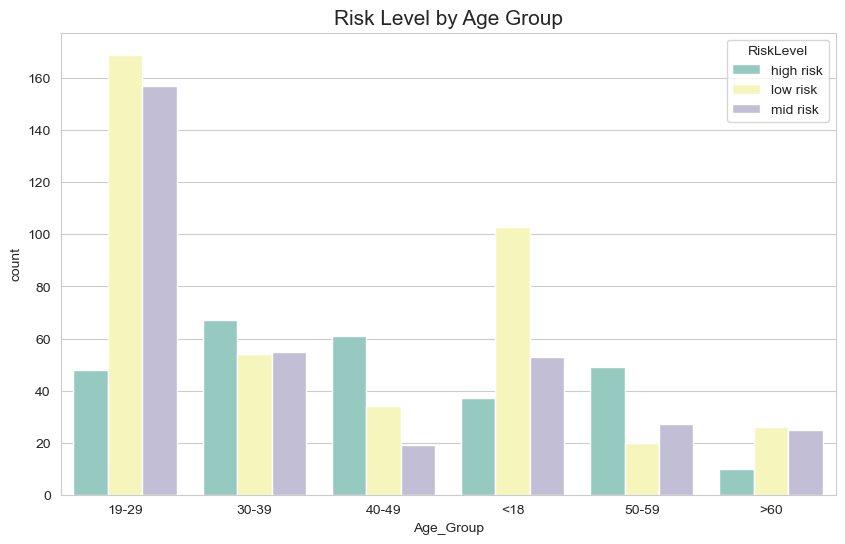

In [151]:
# Looking at the risk level of the participants by age group.

fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=df, x='Age_Group', hue='RiskLevel', palette='Set3')
plt.title('Risk Level by Age Group', fontsize=15)
plt.savefig('img/risk_level_by_age_group.png')
plt.show()

In [152]:
# Looking at the Risk level numbers depending of each age group.

print('Age group of under 18:', df[['Age_Group', 'RiskLevel']].value_counts().loc["<18"])
print('Age group of between 19-29:', df[['Age_Group', 'RiskLevel']].value_counts().loc["19-29"])
print('Age group of between 30-39:', df[['Age_Group', 'RiskLevel']].value_counts().loc["30-39"])
print('Age group of between 40-49:', df[['Age_Group', 'RiskLevel']].value_counts().loc["40-49"])
print('Age group of between 50-59:', df[['Age_Group', 'RiskLevel']].value_counts().loc["50-59"])
print('Age group of over 60:', df[['Age_Group', 'RiskLevel']].value_counts().loc[">60"])

Age group of under 18: RiskLevel
low risk     103
mid risk      53
high risk     37
Name: count, dtype: int64
Age group of between 19-29: RiskLevel
low risk     169
mid risk     157
high risk     48
Name: count, dtype: int64
Age group of between 30-39: RiskLevel
high risk    67
mid risk     55
low risk     54
Name: count, dtype: int64
Age group of between 40-49: RiskLevel
high risk    61
low risk     34
mid risk     19
Name: count, dtype: int64
Age group of between 50-59: RiskLevel
high risk    49
mid risk     27
low risk     20
Name: count, dtype: int64
Age group of over 60: RiskLevel
low risk     26
mid risk     25
high risk    10
Name: count, dtype: int64


With this plot we can compare the risk level between the ages group. 

As the groups of participants in ages group of under 18 and between 19 and 29 are the ones with more participants those groups shows the low risk and mid risk between the women. 

On other hand the groups ages between 30 and 59 are the ones showing high risk. 

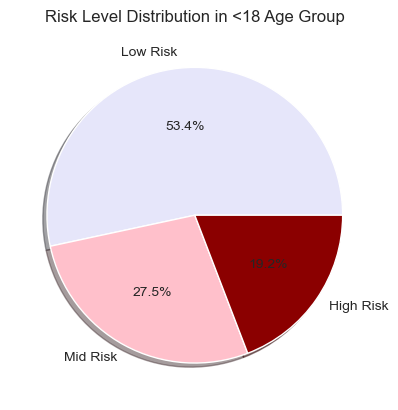

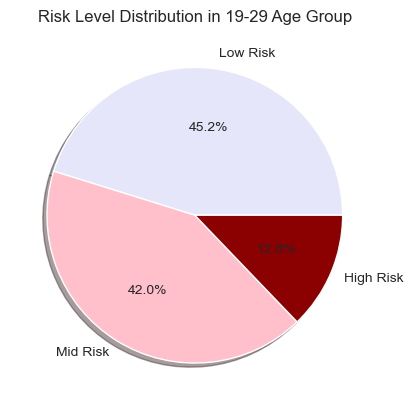

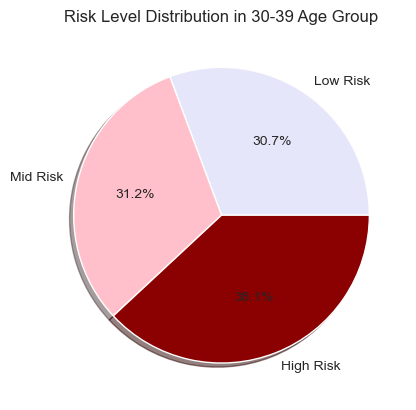

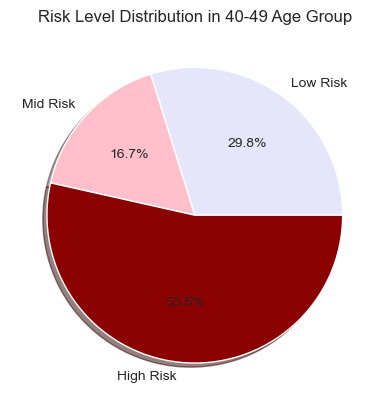

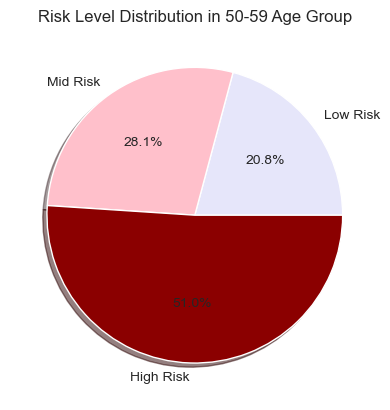

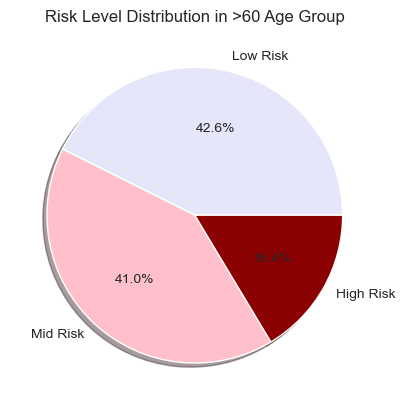

In [153]:
# Looking at the risk level of the participants by age group in a pie chart

age_groups = ["<18", "19-29", "30-39", "40-49", "50-59", ">60"]
low_risk = [103, 169, 54, 34, 20, 26]
mid_risk = [53, 157, 55, 19, 27, 25]
high_risk = [37, 48, 67, 61, 49, 10]

risk_data = list(zip(low_risk, mid_risk, high_risk))
labels = ["Low Risk", "Mid Risk", "High Risk"]
colors = ["lavender", "pink", "darkred"]

for i, age_group in enumerate(age_groups):
    plt.figure()
    plt.pie(risk_data[i], labels=labels, autopct="%1.1f%%", colors=colors, shadow=True)
    plt.title(f"Risk Level Distribution in {age_group} Age Group")
    plt.savefig(f'img/risk_level_distribution-{age_group}.png')
    plt.show()


With the pie charts we can see the percents of the risk levels in maternity more clear:
- The high risk in maternity is most prominent in women of the age group of 30-39 and followed very close by women in their 40s to 49. 
- The mid risk in maternity is kind of the same women of the all ages groups. 
- The lower risk in maternity is most common in women in the ages groups of  under 18 and between 19-29 years old. 


High risk in maternity is most prominent among women aged 30-39, followed by those in the 40-49 age group. Women over 60 have the lowest percentage of high risk compared to other age groups.

In [154]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,Age_Group
Participant,,,,,,,,
0,25,130,80,15.0,98.0,86,high risk,19-29
1,35,140,90,13.0,98.0,70,high risk,30-39
2,29,90,70,8.0,100.0,80,high risk,19-29
3,30,140,85,7.0,98.0,70,high risk,30-39
4,35,120,60,6.1,98.0,76,low risk,30-39


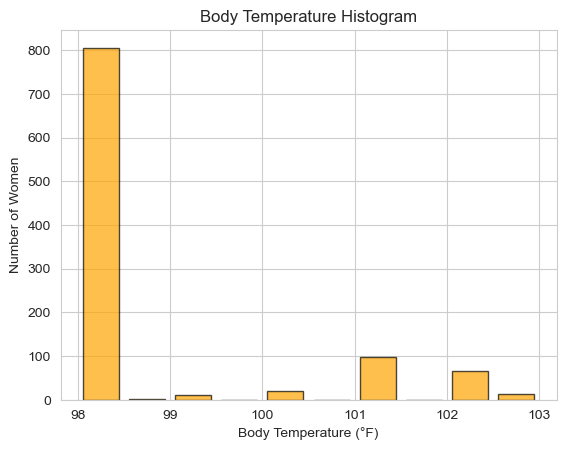

In [155]:
# Plotting the histogram of the body temperature. 

plt.hist(df['BodyTemp'], bins=10, color='orange', edgecolor='black', alpha=0.7, rwidth=0.78)
plt.xlabel('Body Temperature (°F)')
plt.ylabel('Number of Women')
plt.title('Body Temperature Histogram')
plt.savefig('img/body_temp_hist.png')
plt.show()


Looking at the body temperature of the participants the majority (about 800 women) have a body temperature of 98.6 degrees Fahrenheit. 

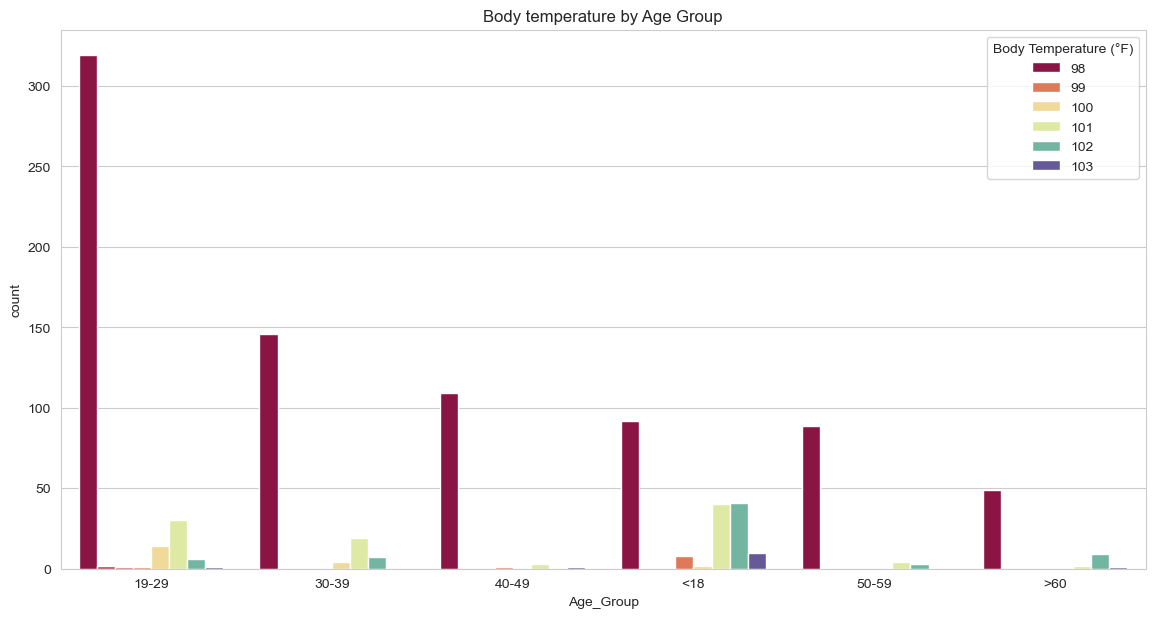

In [156]:
# Looking at the risk level of the participants by age group.

fig, ax = plt.subplots(figsize=(14, 7))
sns.countplot(data=df, x='Age_Group', hue='BodyTemp', palette='Spectral')
plt.title('Body temperature by Age Group')
plt.legend(title='Body Temperature (°F)')
plt.savefig('img/body_temp_by_age_group.png')
plt.show()


If we look into the body temperature by age group, the women under 18 shows a higher body temperature (between 101-102 degrees Fahrenheit) than the rest of the groups.

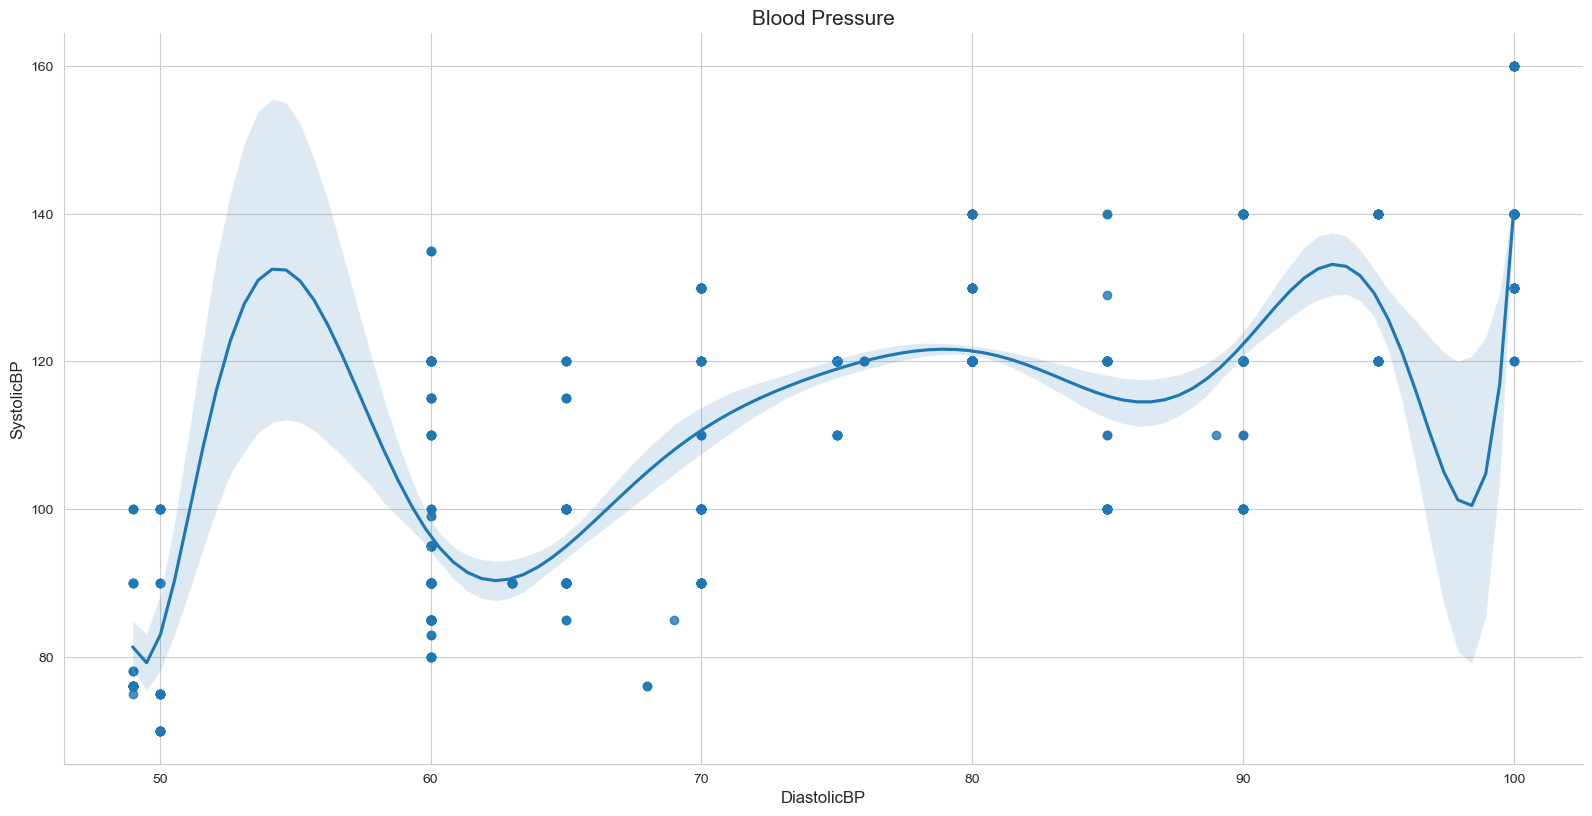

In [157]:
# Looking at the blood pressure SystolicBP and DiastolicBP. 

sns.set_style('whitegrid')

sns.lmplot(x='DiastolicBP', y='SystolicBP', order=10, data=df, height=8, aspect=2)
plt.title('Blood Pressure', fontsize=15)
plt.xlabel('DiastolicBP', fontsize=12)
plt.ylabel('SystolicBP', fontsize=12)
plt.savefig('img/blood_pressure.png')
plt.show()

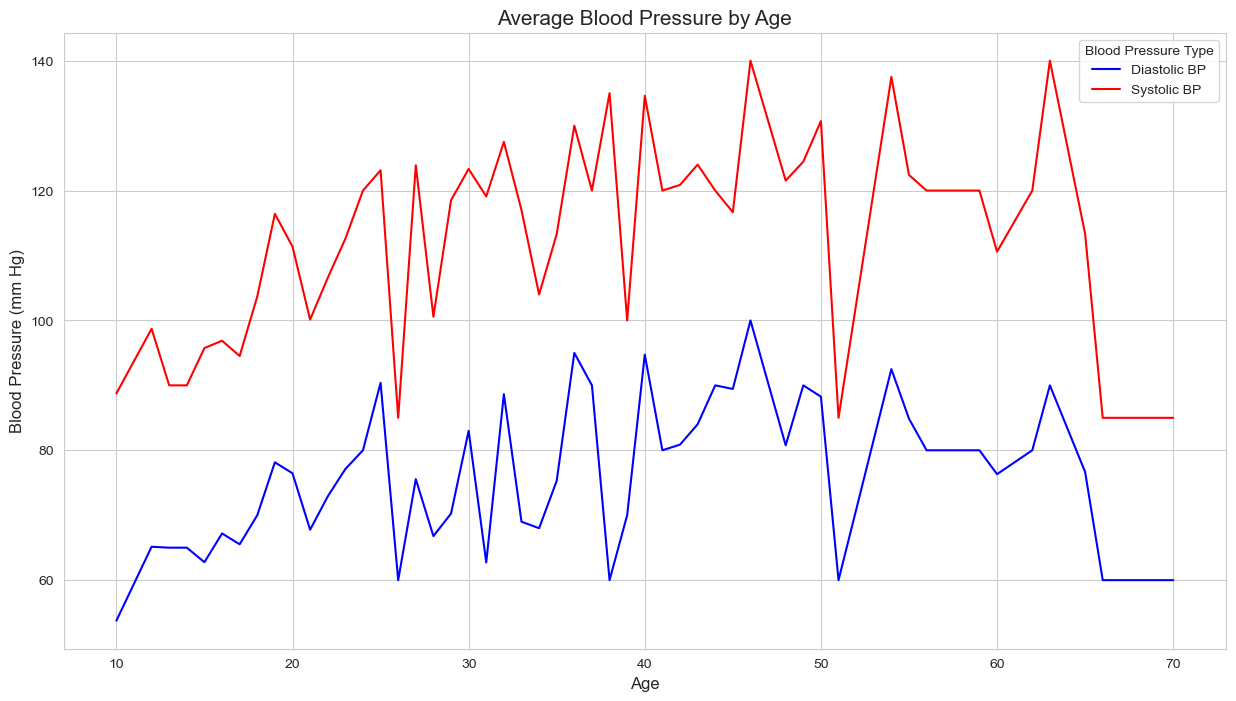

In [158]:
# Looking at the blood pressure by age, in a lineplot

diastolic_bp = df.groupby('Age')['DiastolicBP'].mean()
systolic_bp = df.groupby('Age')['SystolicBP'].mean()

# to do a comparison between the two blood pressures, I'll combine them
# in the same plot.

plt.figure(figsize=(15, 8))

# Adding Diastolic Blood Pressure line
sns.lineplot(x=diastolic_bp.index, y=diastolic_bp, color='blue', label='Diastolic BP')

# Add Systolic Blood Pressure line
sns.lineplot(x=systolic_bp.index, y=systolic_bp, color='red', label='Systolic BP')

# Customize the plot
plt.title('Average Blood Pressure by Age', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Blood Pressure (mm Hg)', fontsize=12)
plt.legend(title='Blood Pressure Type')
plt.grid(True)
plt.savefig('img/blood_pressure_by_age.png')
plt.show()

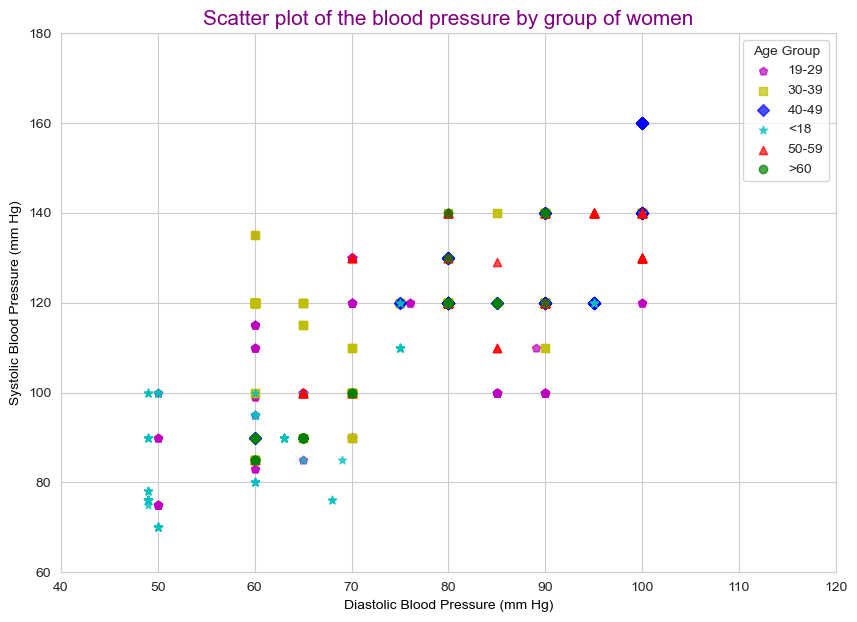

In [159]:
# To start I'll get the data of the variables
age_groups = df['Age_Group'].unique()
# unique() gets the unique elements of the array species, in this case the 3 types of Iris flowers.

# I'll assign different colors and shapes(using the format as markers) for each women group based on their ages, 
# to distinguish the different between each others
colors = ['m', 'y', 'b', 'c', 'r', 'g']
markers = ['p', 's', 'D', '*', '^', 'o']

# I'm using the markers: 'p' as pentagon, 's' as square, , 'D' as diamond, '*' as star, and '^' as triangle_up

# Create a scatter plot.
plt.figure(figsize=(10,7))
for i, age_group in enumerate(age_groups):
    group = df[df['Age_Group'] == age_group]
    plt.scatter(group['DiastolicBP'], group['SystolicBP'], color=colors[i], marker=markers[i], label=age_group, alpha=0.7)

plt.xlabel('Diastolic Blood Pressure (mm Hg)', color='black', fontsize=10)
plt.ylabel('Systolic Blood Pressure (mm Hg)', color='black', fontsize=10)

plt.title('Scatter plot of the blood pressure by group of women', color='purple', fontsize=15)
plt.legend(title='Age Group')
plt.xlim(40, 120)
plt.ylim(60, 180)

plt.savefig('img/blood_pressure_age_group.png')
plt.show()

We can see the blood pressure (Diastolic and Systolic) tends to increased in women after 40 years old. The groups o women under 30 exhibit lower and more stable blood pressure values, while older groups demonstrate both higher values and greater variability.

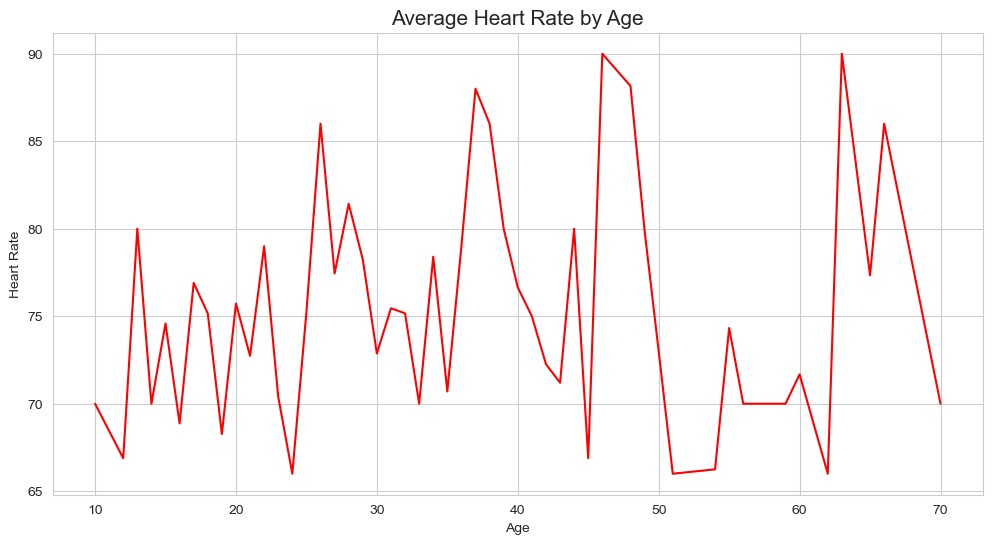

In [160]:
# Looking at the heart rate of the participants in the dataset by age. 

average_heart_rate = df.groupby('Age')['HeartRate'].mean()
plt.figure(figsize=(12, 6))
sns.lineplot(x=average_heart_rate.index, y=average_heart_rate, color='red')
plt.title('Average Heart Rate by Age', fontsize=15)
plt.xlabel('Age')   
plt.ylabel('Heart Rate')
plt.savefig('img/heart_rate_by_age.png')
plt.show()

Looking at the results of the plot we can see that women over the age of 35 generally tend to have a higher heart rate. However, the data also shows that women aged in between 50 and 60 have a lower average heart rate 

Additionally, women under 30s have a regular average of heart rate.

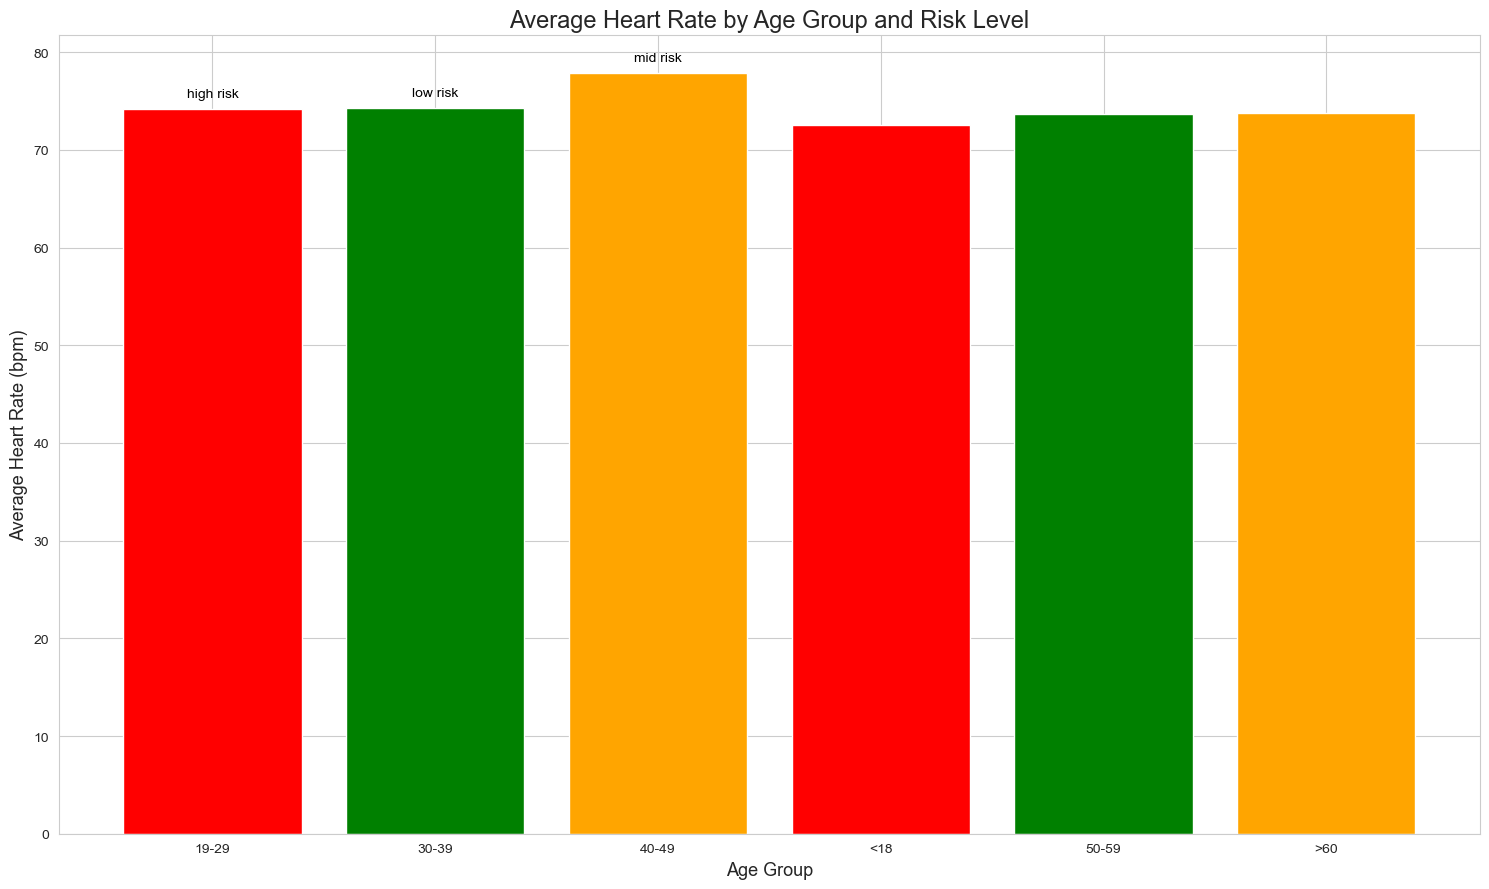

In [161]:
# Average heart rate by age group
average_heart_rate_by_group = df.groupby('Age_Group')['HeartRate'].mean()
age_groups = df['Age_Group'].unique()
risk_levels = df['RiskLevel'].unique()

# Representing the diff
risk_colors = {
    'low risk': 'green',
    'mid risk': 'orange',
    'high risk': 'red'}

# Create a color list based on risk levels
colors = [risk_colors[risk] for risk in risk_levels]

# Plotting
fig, ax = plt.subplots(figsize=(15, 9))
bars = ax.bar(age_groups, average_heart_rate_by_group, color=colors)

ax.set_title('Average Heart Rate by Age Group and Risk Level', fontsize=17)
ax.set_xlabel('Age Group', fontsize=13)
ax.set_ylabel('Average Heart Rate (bpm)', fontsize=13)

# Add risk level annotations on bars
for bar, risk in zip(bars, risk_levels):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, yval + 1, risk, ha='center', va='bottom', fontsize=10, color='black')
    ax.grid(True)

plt.tight_layout()
plt.savefig('img/heart_rate_by_age_group_risk_level.png')
plt.show()

The bar chart below shows that the women in the age groups under 30s have a higher risk that the other groups of women when comparing the average heart rate. 

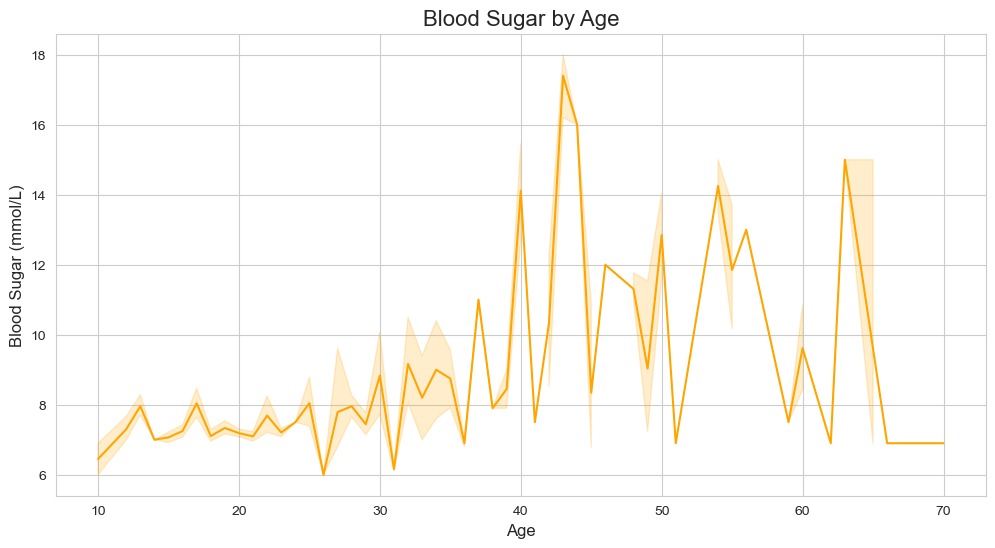

In [162]:
# Looking at the blood sugar plot by age.

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Age", y="BS", color='orange')
plt.title('Blood Sugar by Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Blood Sugar (mmol/L)', fontsize=12)
plt.savefig('img/blood_sugar_by_age.png')
plt.show()

Looking at the plot related with the Blood sugar by age, we can see that women under 30s have like a normal level of blood sugar. In women over 30 there are some spikes, suggesting that women in this age group might experience more pronounced blood sugar irregularities and it can be the result of gestational diabetes.

Here are some references links that I took into consideration for the Blood sugar analysis:
- [What Is Gestational Diabetes?](https://www.health.com/gestational-diabetes-overview-7151701)
- [Blood Glucose Conversion Chart](https://www.albertahealthservices.ca/assets/info/ern/if-ern-blood-glucose-conversion-chart.pdf?Mobile=1&Source=%2Fassets%2F_layouts%2F15%2Fmobile%2Fviewa.aspx%3FList%3D3ccf9404-77ed-45f4-a5cc-5ce14ecbffb7%26View%3D5e55ff97-6586-4968-b81a-cef1097df8e4%26RootFolder%3D%252Fassets%252Finfo%252Fern%26wdFCCState%3D1)

                  Age  SystolicBP  DiastolicBP        BS  BodyTemp  HeartRate
Age          1.000000    0.416045     0.398026  0.473284 -0.255323   0.079798
SystolicBP   0.416045    1.000000     0.787006  0.425172 -0.286616  -0.023108
DiastolicBP  0.398026    0.787006     1.000000  0.423824 -0.257538  -0.046151
BS           0.473284    0.425172     0.423824  1.000000 -0.103493   0.142867
BodyTemp    -0.255323   -0.286616    -0.257538 -0.103493  1.000000   0.098771
HeartRate    0.079798   -0.023108    -0.046151  0.142867  0.098771   1.000000


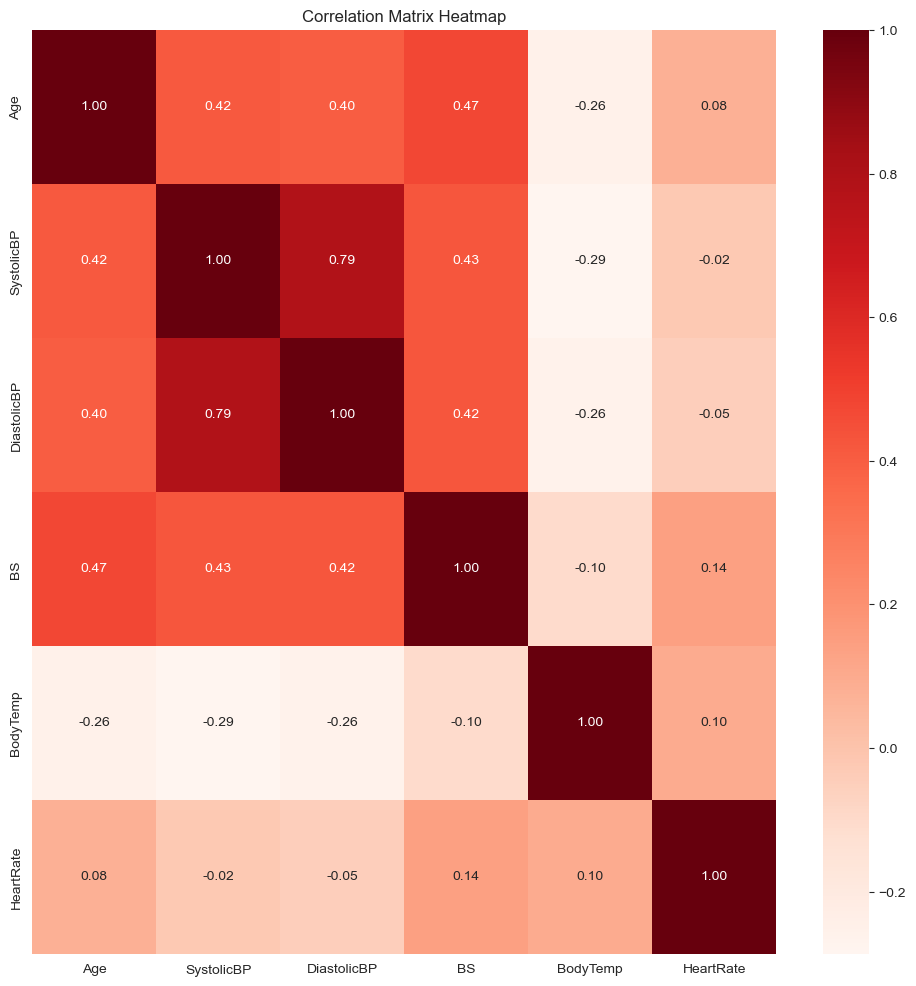

In [163]:
# Looking at the correlation matrix of the numerical columns in the dataset. 
# I'll use the seaborn library to plot the heatmap of the correlation matrix.

# First I'll get only numerical columns
numerical_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
matrix = numerical_df.corr()
print(matrix)

# Plotting the correlation matrix as a heatmap for better visualization.

plt.figure(figsize=(12, 12)) 
sns.heatmap(matrix, annot=True, fmt=".2f", cmap="Reds", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.savefig('img/correlation_matrix_heatmap.png')
plt.show()

************
##### References

- For [pie charts](https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py)
- For the colors in the pie charts I've been looking at the list of [colors in matplotlib](https://matplotlib.org/stable/gallery/color/named_colors.html)
- When plotting with seaborn, I had the reference of [colors here](https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette)
- As I wanted to have the plots images saved into a folder in my directory for the project, I looked in Google and found some interesting information in [stackoverflow](https://stackoverflow.com/questions/11373610/save-matplotlib-file-to-a-directory)



******

End